In [130]:
import numpy as np
import bgshr

import matplotlib.pylab as plt, matplotlib

plt.rcParams["legend.title_fontsize"] = "xx-small"
matplotlib.rc("xtick", labelsize=7)
matplotlib.rc("ytick", labelsize=7)
matplotlib.rc("axes", labelsize=8)
matplotlib.rc("axes", titlesize=8)
matplotlib.rc("legend", fontsize=6)
plt.rcParams['legend.title_fontsize'] = 'xx-small'

In [131]:
ss = [-0.02, -0.001, -0.0001]
size_changes = [-0.1, -10.0]
Q = 5.0

u = 2e-9

In [132]:
def load_data(size_change, Q, u, s):
    data = np.load(f"../simulation_outputs/diversity.size_{size_change}.Q_{Q}.u_{u}.s_{s}.npz")
    ave = data["div"]
    std = data["std"]
    return ave, std

In [133]:
gens = np.linspace(0, 20000, 41)
#xs = np.linspace(0, 1.1e6, 1101)

Ne = 10000
Ts = [0, 2 * Ne]

rs = np.concatenate(([0], np.logspace(-7, -1, 61)))
rmap = bgshr.Util.build_uniform_rmap(1e-8, 1.1e6)
elements = [[100 * i, 100 * (i + 1)] for i in range(1000)]

In [134]:
def get_Bs(gens, df, xs, s, u, rmap, elements):
    # get time series of average B at given xs
    Bs = np.zeros(len(gens))
    for i, g in enumerate(gens):
        df_sub = df[df["Generation"] == g]
        _, _, splines = bgshr.Util.generate_cubic_splines(df_sub)
        B = bgshr.Predict.Bvals(xs, s, splines, u=u, rmap=rmap, elements=elements)
        Bs[i] = B.mean()
    return Bs

def get_pi0(Ns, gens):
    pi0 = np.array([bgshr.ClassicBGS.expected_tmrca_n_epoch_neutral(Ns, [0, 20000 - g]) for g in gens])
    return pi0

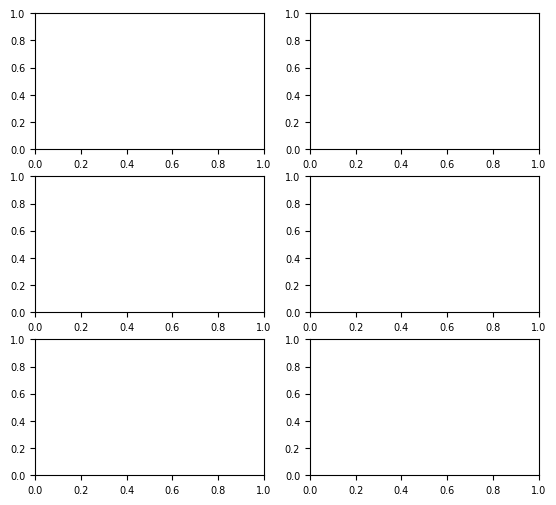

In [135]:
fig1 = plt.figure(1, figsize = (6.5, 6))
fig1.clf()
ax1 = plt.subplot(3, 2, 1) # bottleneck, s=-0.02
ax2 = plt.subplot(3, 2, 2) # expansion, s=-0.02
ax3 = plt.subplot(3, 2, 3) # bottleneck, s=-0.001
ax4 = plt.subplot(3, 2, 4) # expansion, s=-0.001
ax5 = plt.subplot(3, 2, 5) # bottleneck, s=-0.0001
ax6 = plt.subplot(3, 2, 6) # expansion, s=-0.0001

Bottleneck, s=-0.02

In [136]:
Ns = [0.1 * Ne, Ne]
s = -0.02
df = bgshr.ClassicBGS.build_lookup_table_n_epoch([s], rs, Ns, Ts, uL=u, uR=1e-8, generations=gens)

In [137]:
ave, std = load_data(0.1, Q, u, s)
pi0 = get_pi0(Ns, gens)

In [138]:
yy = np.mean(ave[:, :101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, :101], axis=1) / (pi0 / 2 / Ne)
ax1.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(0, 100000, 101)
Bs = get_Bs(gens, df, xs, s, u, rmap, elements)
ax1.plot(gens, Bs, "-", lw=2, label="w/in selected region");

In [139]:
yy = np.mean(ave[:, 250:351], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 250:351], axis=1) / (pi0 / 2 / Ne)
ax1.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(250000, 350000, 101)
Bs = get_Bs(gens, df, xs, s, u, rmap, elements)
ax1.plot(gens, Bs, "-", lw=2, label="$\\sim200$ kb away");

In [140]:
yy = np.mean(ave[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
ax1.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(1050000, 1100000, 101)
Bs = get_Bs(gens, df, xs, s, u, rmap, elements)
ax1.plot(gens, Bs, "-", lw=2, label="$\\sim1$ Mb away");

In [141]:
ax1.set_xticks([0, 5000, 10000, 15000, 20000])
ax1.legend(frameon=False)
ax1.set_ylabel(f"$B$ (s={s})");

Expansion, s=-0.02

In [142]:
Ns = [10 * Ne, Ne]
s = -0.02
df = bgshr.ClassicBGS.build_lookup_table_n_epoch([s], rs, Ns, Ts, uL=u, uR=1e-8, generations=gens)

In [143]:
ave, std = load_data(10.0, Q, u, s)
pi0 = get_pi0(Ns, gens)

In [144]:
yy = np.mean(ave[:, :101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, :101], axis=1) / (pi0 / 2 / Ne)
ax2.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(0, 100000, 101)
Bs = get_Bs(gens, df, xs, s, u, rmap, elements)
ax2.plot(gens, Bs, "-", lw=2, label="w/in selected region");

In [145]:
yy = np.mean(ave[:, 250:351], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 250:351], axis=1) / (pi0 / 2 / Ne)
ax2.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(250000, 350000, 101)
Bs = get_Bs(gens, df, xs, s, u, rmap, elements)
ax2.plot(gens, Bs, "-", lw=2, label="$\\sim200$ kb away");

In [146]:
yy = np.mean(ave[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
ax2.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(1050000, 1100000, 101)
Bs = get_Bs(gens, df, xs, s, u, rmap, elements)
ax2.plot(gens, Bs, "-", lw=2, label="$\\sim1$ Mb away");

In [147]:
ax2.set_xticks([0, 5000, 10000, 15000, 20000])
y0 = min([ax1.get_ylim()[0], ax2.get_ylim()[0]])
y1 = max([ax1.get_ylim()[1], ax2.get_ylim()[1]])
ax1.set_ylim(y0, y1)
ax2.set_ylim(y0, y1)
#ax2.legend()
#ax1.set_ylabel("$B$");

(0.9753218599666784, 0.9980680544327347)

Bottleneck, s=-0.001

In [148]:
# lookup tables have been updated to span 25k gens, measured in 'gens ago'
# we extract the equivalent time slice to match simulations
gens_lookup = gens + 5e+3 
gens_lookup.sort()
gens_lookup

array([ 5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,  8500.,
        9000.,  9500., 10000., 10500., 11000., 11500., 12000., 12500.,
       13000., 13500., 14000., 14500., 15000., 15500., 16000., 16500.,
       17000., 17500., 18000., 18500., 19000., 19500., 20000., 20500.,
       21000., 21500., 22000., 22500., 23000., 23500., 24000., 24500.,
       25000.])

In [149]:
Ns = [0.1 * Ne, Ne]
s = -0.001
df = bgshr.Util.load_lookup_table("../lookup_tables/lookup_tbl_2_epochs_bottleneck.csv.gz")

In [150]:
ave, std = load_data(0.1, Q, u, s)
pi0 = get_pi0(Ns, gens)

In [151]:
yy = np.mean(ave[:, :101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, :101], axis=1) / (pi0 / 2 / Ne)
ax3.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(0, 100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax3.plot(gens, Bs, "-", lw=2, label="w/in selected region");

In [152]:
yy = np.mean(ave[:, 250:351], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 250:351], axis=1) / (pi0 / 2 / Ne)
ax3.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(250000, 350000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax3.plot(gens, Bs, "-", lw=2, label="$\\sim200$ kb away");

In [153]:
yy = np.mean(ave[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
ax3.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(1050000, 1100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax3.plot(gens, Bs, "-", lw=2, label="$\\sim1$ Mb away");

In [154]:
ax3.set_xticks([0, 5000, 10000, 15000, 20000])
ax3.legend(frameon=False)
ax3.set_ylabel(f"$B$ (s={s})");

Expansion, s=-0.001

In [155]:
Ns = [10 * Ne, Ne]
s = -0.001
df = bgshr.Util.load_lookup_table("../lookup_tables/lookup_tbl_2_epochs_expansion.csv.gz")

In [156]:
ave, std = load_data(10.0, Q, u, s)
pi0 = get_pi0(Ns, gens)

In [157]:
yy = np.mean(ave[:, :101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, :101], axis=1) / (pi0 / 2 / Ne)
ax4.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(0, 100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax4.plot(gens, Bs, "-", lw=2, label="w/in selected region");

In [158]:
yy = np.mean(ave[:, 250:351], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 250:351], axis=1) / (pi0 / 2 / Ne)
ax4.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(250000, 350000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax4.plot(gens, Bs, "-", lw=2, label="$\\sim200$ kb away");

In [159]:
yy = np.mean(ave[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
ax4.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(1050000, 1100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax4.plot(gens, Bs, "-", lw=2, label="$\\sim1$ Mb away");

In [160]:
ax4.set_xticks([0, 5000, 10000, 15000, 20000])
y0 = min([ax3.get_ylim()[0], ax4.get_ylim()[0]])
y1 = max([ax3.get_ylim()[1], ax4.get_ylim()[1]])
ax3.set_ylim(y0, y1)
ax4.set_ylim(y0, y1)
#ax2.legend()
#ax1.set_ylabel("$B$");

(0.8505742828108684, 1.0073740421321031)

Bottleneck, s=-0.0001

In [161]:
Ns = [0.1 * Ne, Ne]
s = -0.0001
df = bgshr.Util.load_lookup_table("../lookup_tables/lookup_tbl_2_epochs_bottleneck.csv.gz")

In [162]:
ave, std = load_data(0.1, Q, u, s)
pi0 = get_pi0(Ns, gens)

In [163]:
yy = np.mean(ave[:, :101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, :101], axis=1) / (pi0 / 2 / Ne)
ax5.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(0, 100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax5.plot(gens, Bs, "-", lw=2, label="w/in selected region");

In [164]:
yy = np.mean(ave[:, 250:351], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 250:351], axis=1) / (pi0 / 2 / Ne)
ax5.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(250000, 350000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax5.plot(gens, Bs, "-", lw=2, label="$\\sim200$ kb away");

In [165]:
yy = np.mean(ave[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
ax5.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(1050000, 1100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax5.plot(gens, Bs, "-", lw=2, label="$\\sim1$ Mb away");

In [166]:
ax5.set_xticks([0, 5000, 10000, 15000, 20000])
ax5.legend(frameon=False)
ax5.set_ylabel(f"$B$ (s={s})");

Expansion, s=-0.0001

In [167]:
Ns = [10 * Ne, Ne]
s = -0.0001
df = bgshr.Util.load_lookup_table("../lookup_tables/lookup_tbl_2_epochs_expansion.csv.gz")

In [168]:
ave, std = load_data(10.0, Q, u, s)
pi0 = get_pi0(Ns, gens)

In [169]:
yy = np.mean(ave[:, :101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, :101], axis=1) / (pi0 / 2 / Ne)
ax6.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(0, 100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax6.plot(gens, Bs, "-", lw=2, label="w/in selected region");

In [170]:
yy = np.mean(ave[:, 250:351], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 250:351], axis=1) / (pi0 / 2 / Ne)
ax6.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(250000, 350000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax6.plot(gens, Bs, "-", lw=2, label="$\\sim200$ kb away");

In [171]:
yy = np.mean(ave[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
err = np.mean(std[:, 1050:1101], axis=1) / (pi0 / 2 / Ne)
ax6.fill_between(gens, yy - 2 * err, yy + 2 * err, alpha=0.3)
xs = np.linspace(1050000, 1100000, 101)
Bs = get_Bs(gens_lookup, df, xs, s, u, rmap, elements)
ax6.plot(gens, Bs, "-", lw=2, label="$\\sim1$ Mb away");

In [172]:
ax5.set_xticks([0, 5000, 10000, 15000, 20000])
y0 = min([ax5.get_ylim()[0], ax6.get_ylim()[0]])
y1 = max([ax5.get_ylim()[1], ax6.get_ylim()[1]])
ax5.set_ylim(y0, y1)
ax6.set_ylim(y0, y1)
#ax2.legend()
#ax1.set_ylabel("$B$");
ax5.set_xlabel("Generations since size change")
ax6.set_xlabel("Generations since size change")
ax1.set_title("10-fold bottleneck")
ax2.set_title("10-fold expansion");

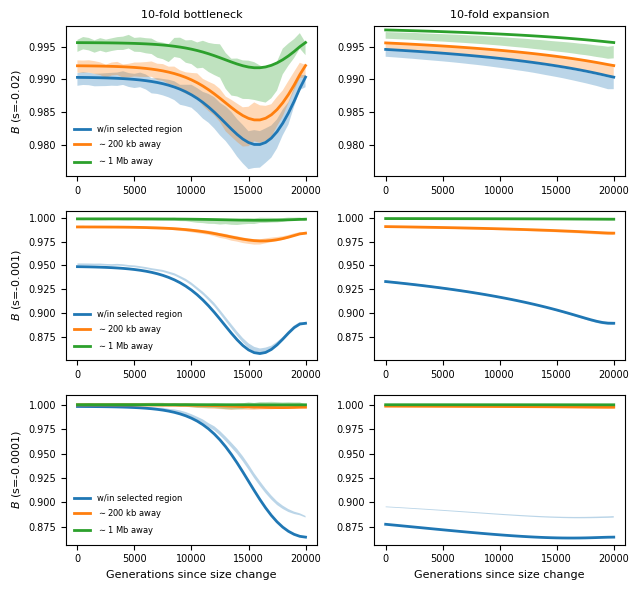

In [173]:
fig1.tight_layout()
fig1

In [176]:
fig1.savefig("time-series-averages.pdf")

### Figures showing B values across the simulated chromosome at different time points

In [200]:
times = [0, 1000, 5000, 10000, 15000, 20000]
df_bot = bgshr.Util.load_lookup_table("../lookup_tables/lookup_tbl_2_epochs_bottleneck.csv.gz")
df_exp = bgshr.Util.load_lookup_table("../lookup_tables/lookup_tbl_2_epochs_expansion.csv.gz")

In [201]:
s = -0.001
xs = np.linspace(0, 1.1e6, 1101)

def plot_slice(ax, ave, std, pi0, df, gen, Ne):
    i = np.where(gens == gen)[0][0]
    y = ave[i] / (pi0[i] / 2 / Ne)
    e = std[i] / (pi0[i] / 2 / Ne)
    df_sub = df[df["Generation"] == gen + 5000] # mind extended time to 25,000 vs ref 20,000 generations
    _, _, splines = bgshr.Util.generate_cubic_splines(df_sub)
    B = bgshr.Predict.Bvals(xs, s, splines, u=2e-9, rmap=rmap, elements=elements)
    ax.fill_between(xs, y - 2 * e, y + 2 * e, alpha=0.3)
    ax.plot(xs, y, "--", lw=1)
    ax.plot(xs, B, lw=1)

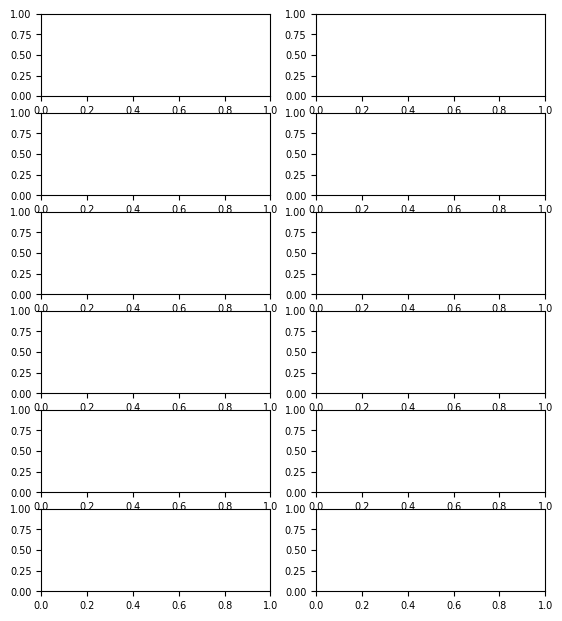

In [202]:
fig2, axes2 = plt.subplots(6, 2, figsize=(6.5, 7.5));

In [203]:
ave, std = load_data(0.1, 5.0, u, s)
pi0 = get_pi0([1000, 10000], gens)
plot_slice(axes2[0][0], ave, std, pi0, df_bot, times[0], Ne)
plot_slice(axes2[1][0], ave, std, pi0, df_bot, times[1], Ne)
plot_slice(axes2[2][0], ave, std, pi0, df_bot, times[2], Ne)
plot_slice(axes2[3][0], ave, std, pi0, df_bot, times[3], Ne)
plot_slice(axes2[4][0], ave, std, pi0, df_bot, times[4], Ne)
plot_slice(axes2[5][0], ave, std, pi0, df_bot, times[5], Ne)
axes2[0][0].set_ylabel(f"$B$ (gen. {times[0]})")
axes2[1][0].set_ylabel(f"$B$ (gen. {times[1]})")
axes2[2][0].set_ylabel(f"$B$ (gen. {times[2]})")
axes2[3][0].set_ylabel(f"$B$ (gen. {times[3]})")
axes2[4][0].set_ylabel(f"$B$ (gen. {times[4]})")
axes2[5][0].set_ylabel(f"$B$ (gen. {times[5]})");

In [204]:
ave, std = load_data(10.0, 5.0, u, s)
pi0 = get_pi0([100000, 10000], gens)
plot_slice(axes2[0][1], ave, std, pi0, df_exp, times[0], Ne)
plot_slice(axes2[1][1], ave, std, pi0, df_exp, times[1], Ne)
plot_slice(axes2[2][1], ave, std, pi0, df_exp, times[2], Ne)
plot_slice(axes2[3][1], ave, std, pi0, df_exp, times[3], Ne)
plot_slice(axes2[4][1], ave, std, pi0, df_exp, times[4], Ne)
plot_slice(axes2[5][1], ave, std, pi0, df_exp, times[5], Ne)
axes2[-1][0].set_xlabel("Distance from selected region (Mb)")
axes2[-1][1].set_xlabel("Distance from selected region (Mb)");

In [205]:
for axs in axes2:
    for ax in axs: 
        ax.set_xticks([1e5, 3e5, 5e5, 7e5, 9e5, 11e5])
        ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])

axes2[0][0].set_title(f"10-fold bottleneck (s={s})")
axes2[0][1].set_title(f"10-fold expansion (s={s})");

In [206]:
fig2.tight_layout()
fig2.savefig(f"time_slices_{s}.pdf")

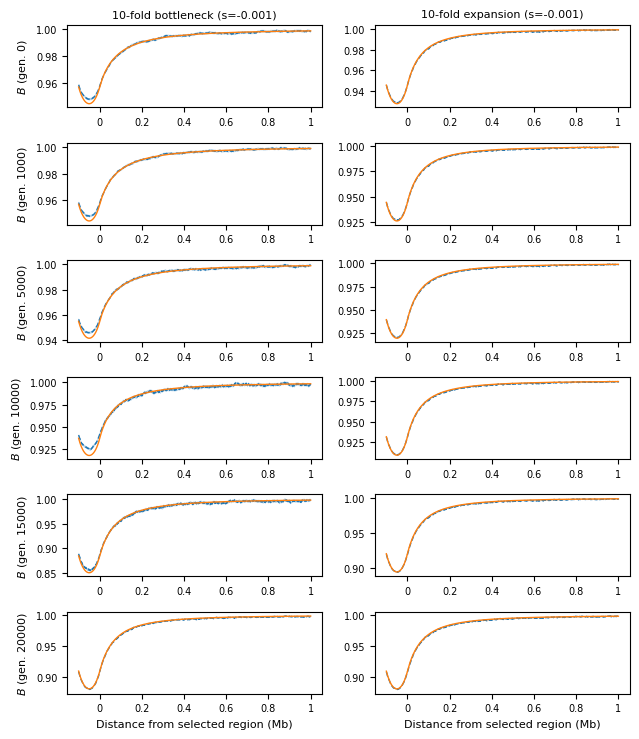

In [207]:
fig2

In [208]:
s = -0.0001

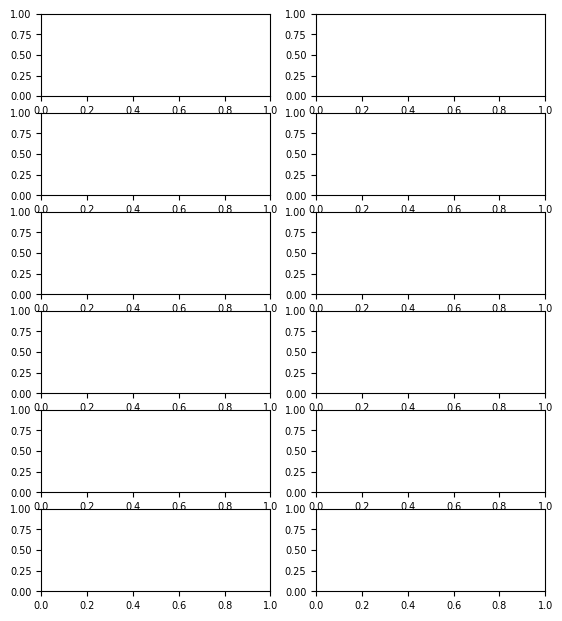

In [209]:
fig3, axes3 = plt.subplots(6, 2, figsize=(6.5, 7.5));

In [210]:
ave, std = load_data(0.1, 5.0, u, s)
pi0 = get_pi0([1000, 10000], gens)
plot_slice(axes3[0][0], ave, std, pi0, df_bot, times[0], Ne)
plot_slice(axes3[1][0], ave, std, pi0, df_bot, times[1], Ne)
plot_slice(axes3[2][0], ave, std, pi0, df_bot, times[2], Ne)
plot_slice(axes3[3][0], ave, std, pi0, df_bot, times[3], Ne)
plot_slice(axes3[4][0], ave, std, pi0, df_bot, times[4], Ne)
plot_slice(axes3[5][0], ave, std, pi0, df_bot, times[5], Ne)
axes3[0][0].set_ylabel(f"$B$ (gen. {times[0]})")
axes3[1][0].set_ylabel(f"$B$ (gen. {times[1]})")
axes3[2][0].set_ylabel(f"$B$ (gen. {times[2]})")
axes3[3][0].set_ylabel(f"$B$ (gen. {times[3]})")
axes3[4][0].set_ylabel(f"$B$ (gen. {times[4]})")
axes3[5][0].set_ylabel(f"$B$ (gen. {times[5]})");

In [211]:
ave, std = load_data(10.0, 5.0, u, s)
pi0 = get_pi0([100000, 10000], gens)
plot_slice(axes3[0][1], ave, std, pi0, df_exp, times[0], Ne)
plot_slice(axes3[1][1], ave, std, pi0, df_exp, times[1], Ne)
plot_slice(axes3[2][1], ave, std, pi0, df_exp, times[2], Ne)
plot_slice(axes3[3][1], ave, std, pi0, df_exp, times[3], Ne)
plot_slice(axes3[4][1], ave, std, pi0, df_exp, times[4], Ne)
plot_slice(axes3[5][1], ave, std, pi0, df_exp, times[5], Ne)
axes3[-1][0].set_xlabel("Distance from selected region (Mb)")
axes3[-1][1].set_xlabel("Distance from selected region (Mb)");

In [212]:
for axs in axes3:
    for ax in axs: 
        ax.set_xticks([1e5, 3e5, 5e5, 7e5, 9e5, 11e5])
        ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])

axes3[0][0].set_title(f"10-fold bottleneck (s={s})")
axes3[0][1].set_title(f"10-fold expansion (s={s})");

In [213]:
fig3.tight_layout()
fig3.savefig(f"time_slices_{s}.pdf")

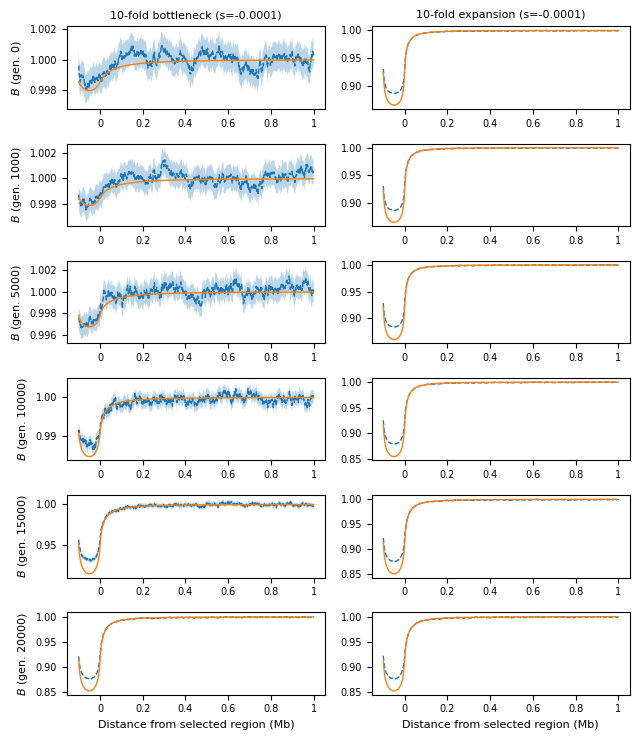

In [214]:
fig3